In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data_root_dir = '..\..\cdp-unlocking-climate-solutions'
data_cities_dir = data_root_dir + '\cities\cities responses\\'

In [4]:
file = '%s\\2020_Full_Cities_Dataset.csv' % data_cities_dir

dataframe = pd.read_csv(file)

In [5]:
def rename_mapper(index_label):
    return str.lower(index_label).replace(' ','_')

In [6]:
df_disc_2018 = pd.read_csv(data_root_dir + '\Cities\Cities Disclosing\\2018_Cities_Disclosing_to_CDP.csv')
df_disc_2019 = pd.read_csv(data_root_dir + '\Cities\Cities Disclosing\\2019_Cities_Disclosing_to_CDP.csv')
df_disc_2020 = pd.read_csv(data_root_dir + '\Cities\Cities Disclosing\\2020_Cities_Disclosing_to_CDP.csv')

df_disc_2018['year'] = 2018
df_disc_2019['year'] = 2019
df_disc_2020['year'] = 2020

df_disc_2018.rename(columns=rename_mapper,inplace=True)
df_disc_2019.rename(columns=rename_mapper,inplace=True)
df_disc_2020.rename(columns=rename_mapper,inplace=True)

df_disc = pd.concat([df_disc_2018,df_disc_2019,df_disc_2020])


In [7]:
df_disc

,year_reported_to_cdp,account_number,organization,city,country,cdp_region,reporting_authority,access,first_time_discloser,population,population_year,city_location,last_update,year
0,2018,58671,Helsingør Kommune / Elsinore Municipality,Helsingør,Denmark,Europe,CDP Cities,public,No,62686.0,2017,POINT (12.5921 56.0308),2020-06-25T04:52:49.050,2018
1,2018,59167,Municipalidad de Providencia,Providencia,Chile,Latin America,CDP Cities,public,No,126487.0,2012,POINT (-70.6092 -33.4313),2020-06-25T04:52:49.050,2018
2,2018,50553,City of Fresno,Fresno,United States of America,North America,CDP Cities,public,Yes,527438.0,2017,POINT (-119.773 36.7468),2020-06-25T04:52:49.050,2018
3,2018,826407,Munícipio de Mirandela,Mirandela,Portugal,Europe,CDP Cities,public,Yes,11852.0,2011,POINT (-7.1753 41.51),2020-06-25T04:52:49.050,2018
4,2018,60375,Gobiernación del Archipiélago de San Andrés,Archipiélago de San Andrés,Colombia,Latin America,CDP Cities,public,No,120000.0,2017,POINT (-81.6976 12.5794),2020-06-25T04:52:49.050,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2020,35874,City of Phoenix,Phoenix,United States of America,North America,"C40,CDP Cities,ICLEI - Local Governments for S...",public,No,1660272.0,2018,POINT (-112.074 33.4484),2020-09-07T09:45:19.793,2020
562,2020,42178,Distrito Metropolitano de Quito,Quito,Ecuador,Latin America,"C40,CDP Cities,ICLEI - Local Governments for S...",public,No,2239191.0,2010,POINT (-78.5167 -0.2333),2020-09-07T09:45:19.793,2020
563,2020,848129,Esquías,NaN,Honduras,Latin America,"CDP Cities,ICLEI - Local Governments for Susta...",public,Yes,18308.0,2018,NaN,2020-09-07T09:45:19.793,2020
564,2020,54632,Prefeitura de Caruaru,Caruaru,Brazil,Latin America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,314912.0,2010,NaN,2020-09-07T09:45:19.793,2020


In [8]:
df_2020 = dataframe_disc_2020.groupby('cdp_region',as_index=False).size()
df_2019 = dataframe_disc_2019.groupby('cdp_region',as_index=False).size()
df_2018 = dataframe_disc_2018.groupby('cdp_region',as_index=False).size()


NameError: name 'dataframe_disc_2020' is not defined

Text(0, 0.5, '# Cities')

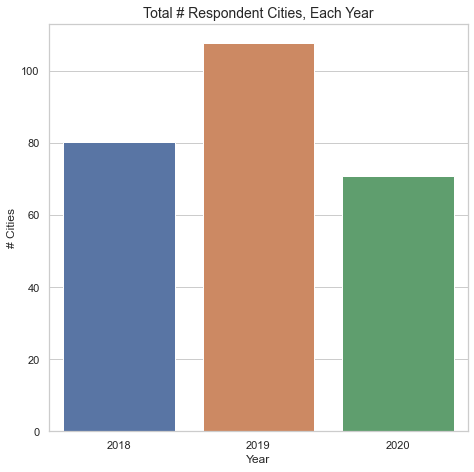

In [107]:
df_tmp = df_disc.groupby(['cdp_region','year'],as_index=False).size()

sns.set_theme(style='whitegrid')
plt.figure(figsize=(7.5,7.5))

graph = sns.barplot(
    data=df_tmp,
    x='year', 
    y='size',
    palette='deep',
    ci=None
    ).set_title(
        'Total # Respondent Cities, Each Year'
        , size=14
    )

plt.xlabel('Year')
plt.ylabel('# Cities')

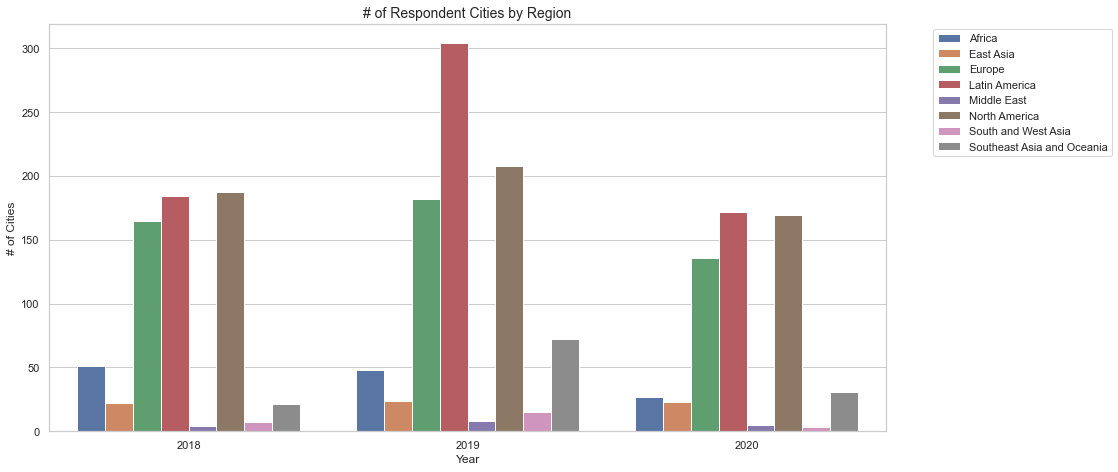

In [109]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(15,7.5))
graph = sns.barplot(
    data=df_tmp,
    x='year', 
    y='size', 
    hue='cdp_region',
     palette='deep'
     ).set_title(
    '# of Respondent Cities by Region',
    size=14
    )
plt.xlabel('Year')
plt.ylabel('# of Cities')


# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

Text(0.5, 1.0, 'Survey Participation')

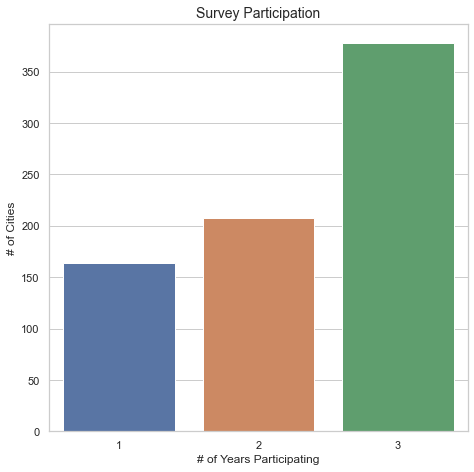

In [173]:
df_tmp = df_disc
df_tmp = df_tmp[['city','year']]
df_tmp = df_tmp.groupby('city',as_index=False).nunique()

df_tmp = df_tmp.groupby('year',as_index=False).size()

plt.figure(figsize=(7.5,7.5))
sns.barplot(data=df_tmp,x='year',y='size')
plt.xlabel('# of Year''s Participating')
plt.ylabel('# of Cities')
plt.title('Survey Participation',size=14)

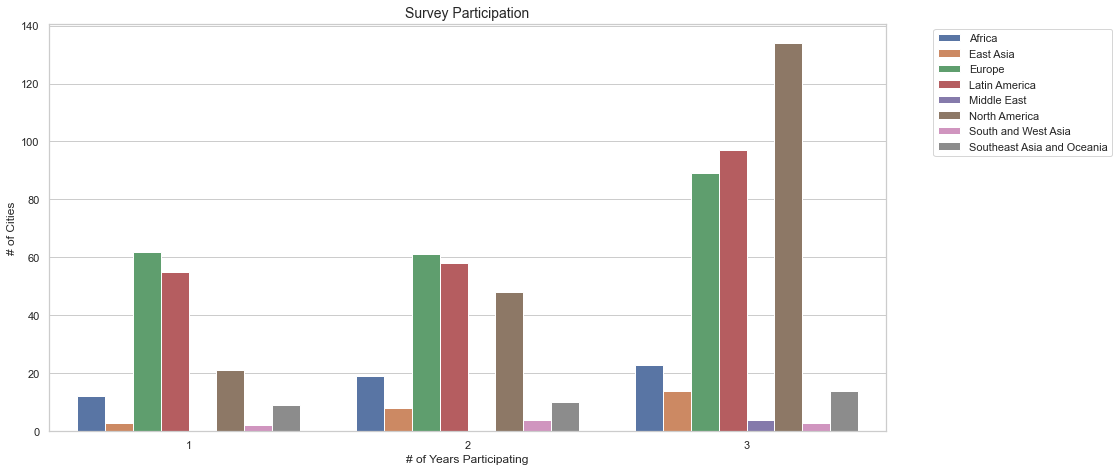

In [175]:
df_tmp = df_disc
df_tmp = df_tmp[['cdp_region','city','year']]
df_tmp = df_tmp.groupby(['cdp_region','city'],as_index=False).nunique()

df_tmp = df_tmp.groupby(['cdp_region','year'], as_index=False).nunique()
plt.figure(figsize=(15,7.5))
sns.barplot(data=df_tmp,x='year',y='city',hue='cdp_region')

plt.xlabel('# of Year''s Participating')
plt.ylabel('# of Cities')
plt.title('Survey Participation',size=14)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [114]:
for name,group in dataframe_disc_2019.groupby('cdp_region'):
    print(name)
    print(group.describe().sort_values(by='population_year',ascending=False))

Africa
       year_reported_to_cdp  account_number    population  population_year
max                  2019.0   834202.000000  3.887636e+07      2019.000000
75%                  2019.0    64720.000000  3.374328e+06      2017.250000
50%                  2019.0    58726.500000  1.225235e+06      2016.000000
mean                 2019.0   148191.625000  3.275611e+06      1512.458333
25%                  2019.0    36035.000000  3.858395e+05      1509.250000
std                     0.0   261531.523155  6.930402e+06       882.121692
count                  48.0       48.000000  3.800000e+01        48.000000
min                  2019.0    31115.000000  7.000000e+00         0.000000
East Asia
       year_reported_to_cdp  account_number    population  population_year
max                  2019.0   834161.000000  3.734132e+07      2019.000000
75%                  2019.0    58146.750000  1.211865e+07      2018.000000
50%                  2019.0    54339.500000  5.460109e+06      2017.000000
mean    

In [63]:
dframe_2019 = pd.read_csv(data_root_dir + '\\Cities\Cities Responses\\2019_Full_Cities_Dataset.csv')

dframe_2019.rename(columns=rename_mapper,inplace=True)

In [54]:
df = dframe_2019[dframe_2019['question_number'] == '8.2']

df = df[['cdp_region','country','column_name','response_answer','account_number']]

dataframe_disc_2019[['account_number','population']][pd.isnull(dataframe_disc_2019['population'])]

,account_number,population
0,840309,NaN
2,840914,NaN
3,841416,NaN
4,840030,NaN
5,54649,NaN
...,...,...
848,58489,NaN
853,54683,NaN
855,840944,NaN
856,45219,NaN


In [9]:
dataframe.rename(columns=rename_mapper,inplace=True)

In [94]:
df[df['question_number']=='1.0'][['response_answer']].groupby('response_answer',as_index=False).size().sort_values(by='size', ascending=False)

df[df['question_number']=='2.0'][['response_answer']].groupby('response_answer',as_index=False).size().sort_values(by='size', ascending=False)

df[df['question_number']=='4.0'][['response_answer']].groupby('response_answer',as_index=False).size().sort_values(by='size', ascending=False)

df[df['question_number']=='5.0'][['response_answer']].groupby('response_answer',as_index=False).size().sort_values(by='size', ascending=False)

df[df['question_number']=='8.0'][['response_answer']].groupby('response_answer',as_index=False).size().sort_values(by='size', ascending=False)

,response_answer,size
4,Yes,246
2,Intending to undertake in the next 2 years,104
1,In progress,81
0,Do not know,52
3,Not intending to undertake,44
